# TESS Kepler Comparison

In [1]:
from astropy.io import fits
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# change some default plotting parameters
import matplotlib as mpl
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.cmap'] = 'Greys_r'
%matplotlib inline

In [2]:
hdulist = fits.open('kepler.fits')

In [3]:
image_data = hdulist[0].data

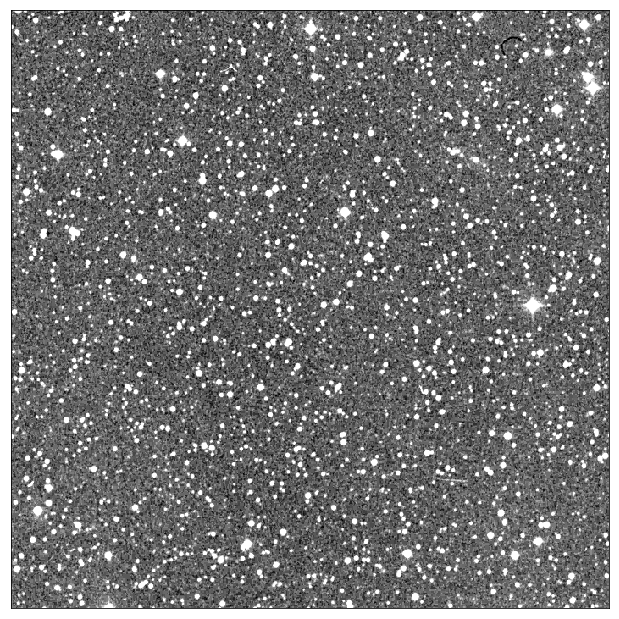

In [4]:
from astropy.visualization import ZScaleInterval
interval = ZScaleInterval()
(imin,imax) = interval.get_limits(image_data)
plt.figure(figsize=(11,11))
plt.imshow(image_data, vmin=imin,vmax=imax)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig("dss.png")
plt.show()

In [5]:
scale = 20*60/706 #arcmin/pixel
print(scale)
kepler = 3.98
TESS = 21.1
k_bin = np.round(scale/kepler*706)
t_bin = np.round(scale/TESS*706)
print(k_bin)
print(t_bin)

1.6997167138810199
302.0
57.0


In [6]:
X,Y = np.meshgrid(np.arange(len(image_data[0])),np.arange(len(image_data[1])))
ret = stats.binned_statistic_2d(X.flatten(),Y.flatten(),image_data.flatten(),bins=k_bin,statistic='mean')
binned_image = np.transpose(ret.statistic)

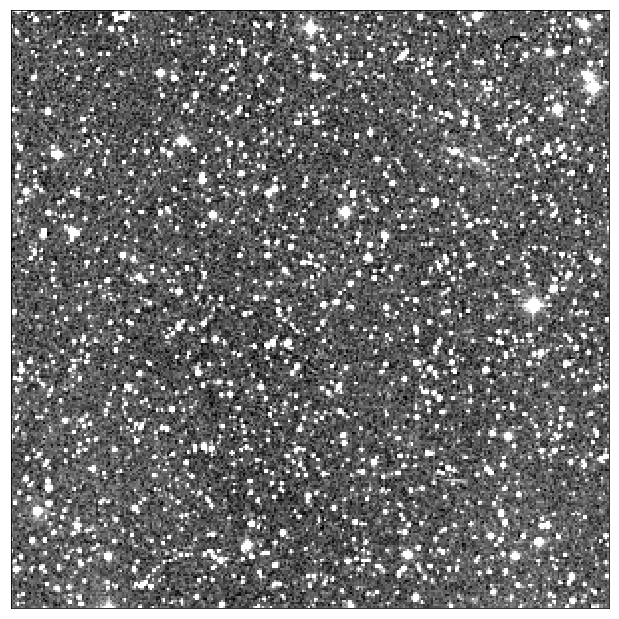

In [7]:
interval = ZScaleInterval()
(imin,imax) = interval.get_limits(binned_image)
plt.figure(figsize=(11,11))
plt.imshow(binned_image, vmin=imin,vmax=imax)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig("kepler.png")
plt.show()

In [8]:
X,Y = np.meshgrid(np.arange(len(image_data[0])),np.arange(len(image_data[1])))
ret = stats.binned_statistic_2d(X.flatten(),Y.flatten(),image_data.flatten(),bins=t_bin,statistic='mean')
binned_image = np.transpose(ret.statistic)

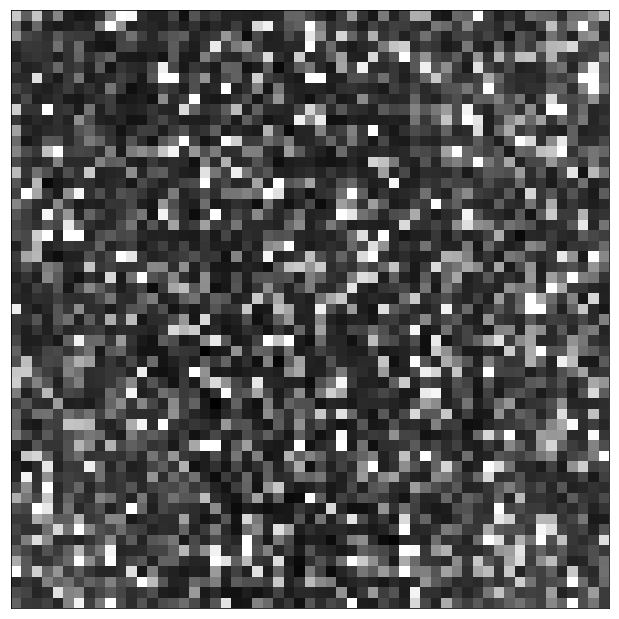

In [9]:
interval = ZScaleInterval()
(imin,imax) = interval.get_limits(binned_image)
plt.figure(figsize=(11,11))
plt.imshow(binned_image, vmin=imin,vmax=imax)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig("tess.png")
plt.show()